In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from scipy.stats import f_oneway
pd.set_option('display.max_rows', 1000)

In [2]:
df = pd.read_csv('merged_data_결측치제거_시간변환_userkey추가.csv')
df

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,event_time_moscow,event_month,user_key
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:00+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:03+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 03:00:07+03:00,10.0,42968183049e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:07+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 03:00:15+03:00,10.0,42968183049e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...,...
20688106,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,2020-03-01 02:59:32+03:00,NaN,622082947fb29909b-6ef5-4662-b4ee-288e73e5dc10
20688107,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,2020-03-01 02:59:39+03:00,NaN,45970561105d2add3-01f7-47ee-8364-27341673227f
20688108,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,2020-03-01 02:59:45+03:00,NaN,622090043ab7d349f-db5d-4790-8ab1-31e5c894459d
20688109,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,2020-03-01 02:59:54+03:00,NaN,61984124218af673b-7fb9-4202-a66d-5c855bc0fd2d


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20688111 entries, 0 to 20688110
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   event_time         object 
 1   event_type         object 
 2   product_id         int64  
 3   category_id        int64  
 4   brand              object 
 5   price              float64
 6   user_id            int64  
 7   user_session       object 
 8   event_time_moscow  object 
 9   event_month        float64
 10  user_key           object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ GB


In [4]:
df.describe()

,product_id,category_id,price,user_id,event_month
count,2.068811e+07,2.068811e+07,2.068811e+07,2.068811e+07,2.067618e+07
mean,5.484276e+06,1.554231e+18,8.535141e+00,5.215433e+08,7.107173e+00
std,1.305755e+06,1.691038e+17,1.938180e+01,8.744435e+07,4.697764e+00
min,3.752000e+03,1.487580e+18,0.000000e+00,4.654960e+05,1.000000e+00
25%,5.724650e+06,1.487580e+18,2.060000e+00,4.817834e+08,2.000000e+00
50%,5.810720e+06,1.487580e+18,4.050000e+00,5.531190e+08,1.000000e+01
75%,5.857864e+06,1.487580e+18,7.060000e+00,5.788491e+08,1.100000e+01
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08,1.200000e+01


In [5]:
df.isnull().sum()

event_time                 0
event_type                 0
product_id                 0
category_id                0
brand                8755357
price                      0
user_id                    0
user_session               0
event_time_moscow          0
event_month            11933
user_key                   0
dtype: int64

In [6]:
df['event_month'].value_counts()

event_month
11.0    4631735
1.0     4255870
2.0     4153196
10.0    4093348
12.0    3542029
Name: count, dtype: int64

In [7]:
df[df['event_month'].isnull()]

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,event_time_moscow,event_month,user_key
20676178,2020-02-29 21:00:00+00:00,cart,5863842,1542195323827388674,missha,27.68,546949933,9a39c801-e568-41e6-9cd4-6145a8bc699a,2020-03-01 00:00:00+03:00,NaN,5469499339a39c801-e568-41e6-9cd4-6145a8bc699a
20676179,2020-02-29 21:00:00+00:00,cart,5802440,2151191070908613477,NaN,2.16,597610626,5d2c1b53-98f1-48a9-b602-6e610d56c2b1,2020-03-01 00:00:00+03:00,NaN,5976106265d2c1b53-98f1-48a9-b602-6e610d56c2b1
20676180,2020-02-29 21:00:00+00:00,view,5790563,1487580008263189483,NaN,7.14,595513257,c833ac41-5f03-407f-9688-ff159de1aefe,2020-03-01 00:00:00+03:00,NaN,595513257c833ac41-5f03-407f-9688-ff159de1aefe
20676181,2020-02-29 21:00:01+00:00,view,5723529,1487580005268456287,runail,2.94,418527792,0f9eddff-a4f1-020c-928c-40b3205300c0,2020-03-01 00:00:01+03:00,NaN,4185277920f9eddff-a4f1-020c-928c-40b3205300c0
20676182,2020-02-29 21:00:02+00:00,cart,5792813,1487580005092295511,NaN,5.56,542675615,80f6d51e-d07c-4ebe-b40e-da63b94f844f,2020-03-01 00:00:02+03:00,NaN,54267561580f6d51e-d07c-4ebe-b40e-da63b94f844f
...,...,...,...,...,...,...,...,...,...,...,...
20688106,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,2020-03-01 02:59:32+03:00,NaN,622082947fb29909b-6ef5-4662-b4ee-288e73e5dc10
20688107,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,2020-03-01 02:59:39+03:00,NaN,45970561105d2add3-01f7-47ee-8364-27341673227f
20688108,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,2020-03-01 02:59:45+03:00,NaN,622090043ab7d349f-db5d-4790-8ab1-31e5c894459d
20688109,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,2020-03-01 02:59:54+03:00,NaN,61984124218af673b-7fb9-4202-a66d-5c855bc0fd2d


In [8]:
# event_month열 비율
df['event_month'].isnull().mean()


0.0005768047164866816

In [9]:
# event_month에 결측치가 있는 행 제거
df = df[~df['event_month'].isnull()]


In [10]:
df.isnull().sum()

event_time                 0
event_type                 0
product_id                 0
category_id                0
brand                8750428
price                      0
user_id                    0
user_session               0
event_time_moscow          0
event_month                0
user_key                   0
dtype: int64

# 날짜/시간 파생 변수 생성

In [11]:
# datetime으로 변환 하기

df['event_time_moscow'] = pd.to_datetime(df['event_time_moscow'])

In [12]:
# 날짜/시간 파생 변수 생성

df['date'] = df['event_time_moscow'].dt.date         # 날짜만
df['hour'] = df['event_time_moscow'].dt.hour         # 시(hour)
df['dayofweek'] = df['event_time_moscow'].dt.dayofweek  # 요일 (0=월)
df['week'] = df['event_time_moscow'].dt.isocalendar().week  # 주차


# 분석1. 기초 분포 시각화

In [13]:
import seaborn as sns
sns.set_palette("pastel")

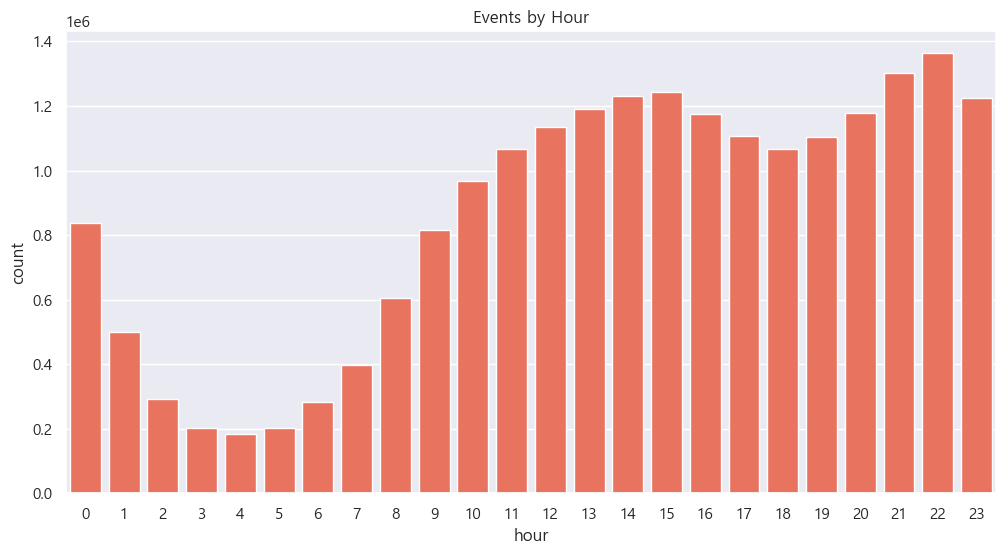

In [14]:
# 시간대별 이벤트 수

sns.countplot(data=df, x='hour', color = 'tomato')
plt.title('Events by Hour')
plt.show()

- 11시 ~ 15시
: 오전/점심 여유시간 쇼핑이 활성화됨
- 20시 ~ 23시
: 가장 활발함, 구매 전환율 높을 가능성 보임 -> 광고 타이밍/알림 최적화

추가분석 필요
- 시간대별 전환율 (purchase / view)	어떤 시간대에 실제 구매로 이어지는지 분석

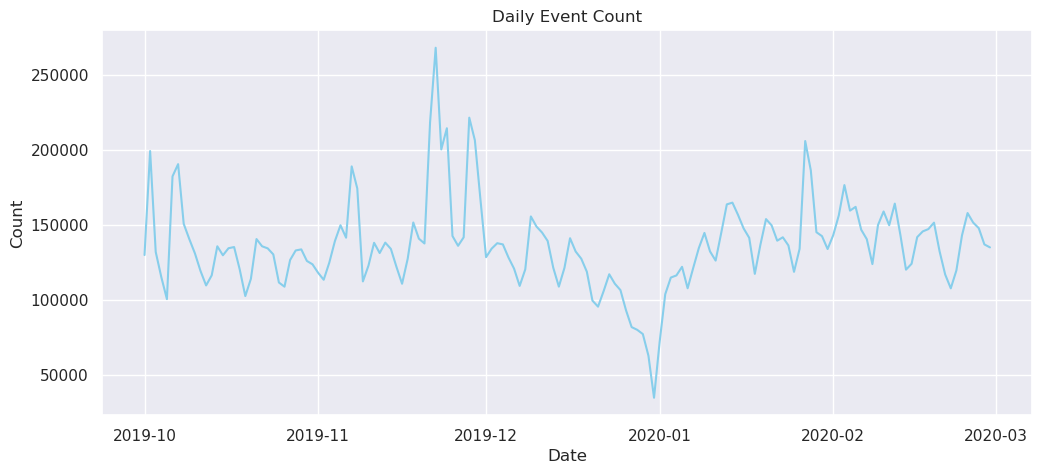

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'  # 기본 제공 폰트
import warnings
warnings.filterwarnings("ignore")            # 폰트 경고 제거

# 일자별 이벤트 수 (시계열)
df['date'].value_counts().sort_index().plot(kind='line', figsize=(12,5), color = 'skyblue')
plt.title('Daily Event Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


#### 2019년 11월~12월
 - 눈에 띄게 이벤트 수가 증가
 - 블랙프라이데이, 연말 쇼핑시즌 효과
#### 2020년 1월 초
 - 이벤트 수 급격하게 감소
 - 보통 크리스마스 직후, 1/1일 직후 비수기
#### 2020년 2월~3월초
 - 비교적 안정적인 흐름이 보임(비수기 시즌 회복)

=> 추가 분석 필요
- 요일/시간대 조합 분석
: 일자별 외에도 특정 요일/시간대 반복성 확인하면 주간 패턴까지 해석 가능

- 전환율 overlay
: 전체 유입 대비 cart/purchase로 이어지는 전환도 트렌드 위에 표시

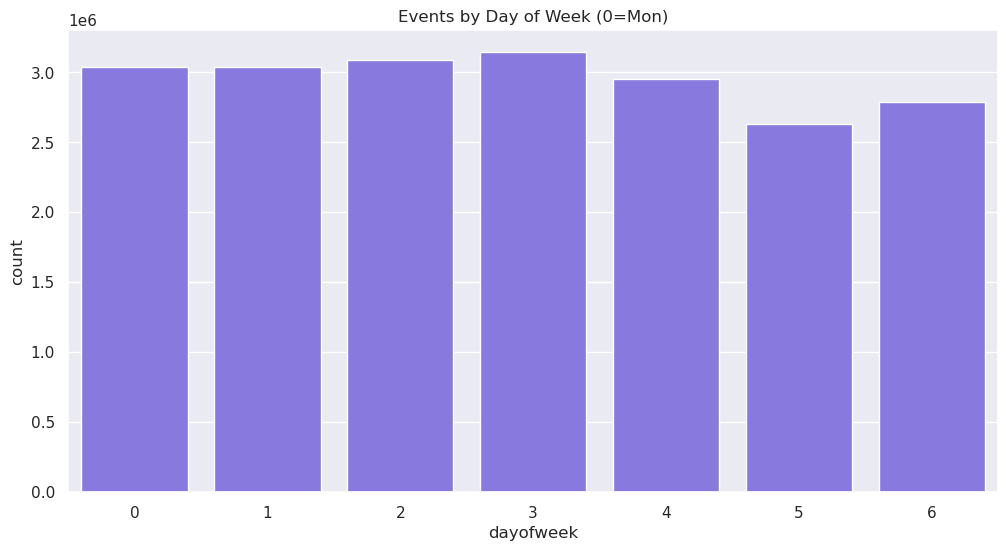

In [16]:
# 요일별 이벤트 수

sns.countplot(data=df, x='dayofweek', color = 'mediumslateblue')
plt.title('Events by Day of Week (0=Mon)')
plt.show()


1. <월~목>
- 전체적인 이벤트 수(사용자 활동)가 많음
- 수요일이 가장 높음
- 업무 중 검색 활동 비중이 크지 않을까 예상
2. <금~일>
- 금요일부터 감소하는 양상을 보임
- 토요일은 최저치


=> 활용 아이디어
- 월~수 : 광고광고/이벤트 집중, 전환 유도 시점
- 금~토 : 활동 감소 고려, 푸시알림 타이밍 조정
- 일 : 리마인더나 특별 프로모션으로 복귀 유도

### event_month 분석

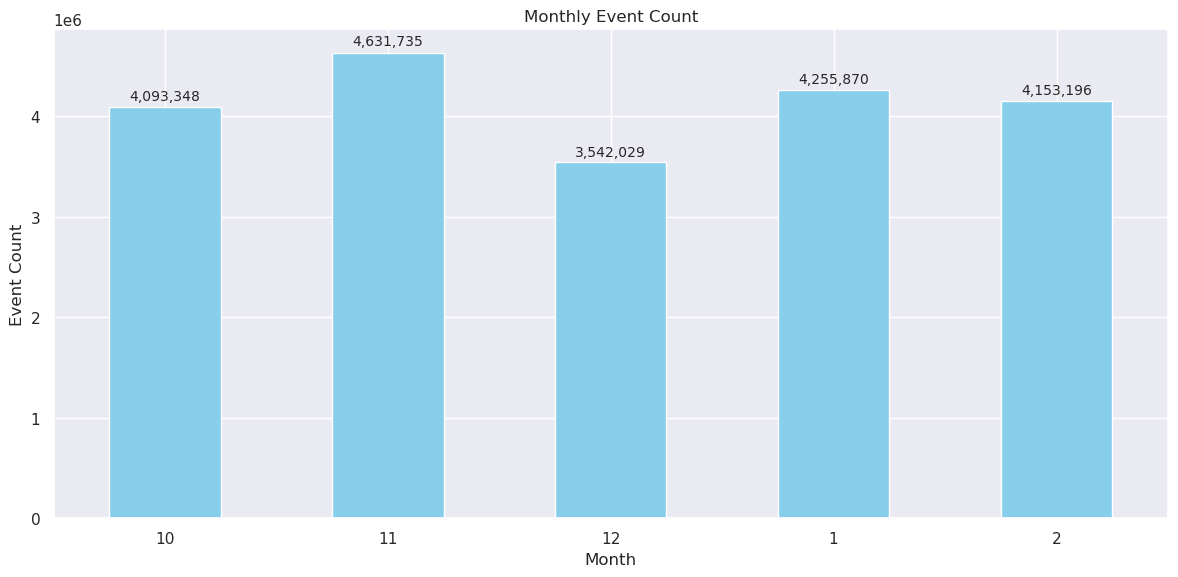

In [17]:
import matplotlib.pyplot as plt

# event_month 분석

# 월 순서를 카테고리형으로 설정 (10월부터 시작해서 2월까지)
month_order = [10, 11, 12, 1, 2]
df['event_month'] = pd.Categorical(df['event_month'], categories=month_order, ordered=True)

# 월별 이벤트 수 집계
monthly_counts = df['event_month'].value_counts().loc[month_order]

# 시각화
ax = monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Monthly Event Count')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.xticks(rotation=0)

# 막대 위에 숫자 표시
for i, value in enumerate(monthly_counts):
    plt.text(i, value + value * 0.01, f'{int(value):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### 11월
- 이벤트 수 가장 많음(약 460만건 이상)
- 연말 쇼핑 시즌과 관련 가능성(블프, 세일)

#### 12월
- 이벤트 급감(약 350만건)
- 배송지연, 예산 등의 요인일 가능성

#### 1~2월
- 회복세 420만건내외로 반등
- 일자별 이벤트 수 시각화(시계열) 그래프와 비교해서 보면, 1월동안 하락세를 보이다가 1월말에 급격하게 증가하는 모습을 볼 수 있음 -> 특별한 세일이 있지 않았을까 예상됨

=>
- 11월은 이벤트가 가장 많은 핵심 활동 시기
- 12월은 급감, 1-2월은 회복 시기

# 분석2. 이벤트 타입별 시간 패턴

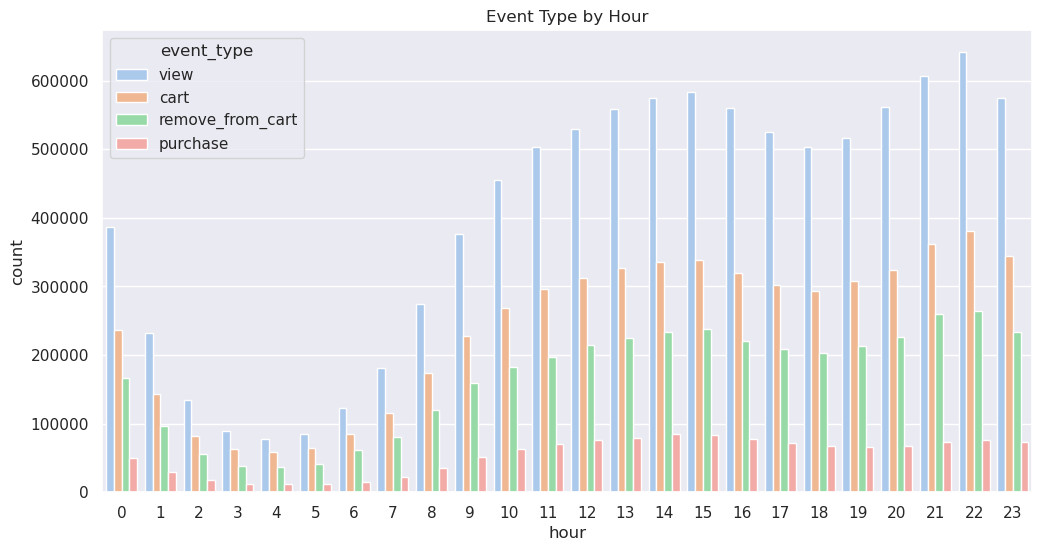

In [18]:
# 시간대별 이벤트 타입(막대그래프)
sns.countplot(data=df, x='hour', hue='event_type')
plt.title('Event Type by Hour')
plt.show()


#### 9~11시
- 활동 급증 시작, view와 cart 수 빠르게 증가

#### 12~16시
- 모든 이벤트 유형이 가장 높음, 피크시간대는 주로 오후시간임

#### 17~18시
- 소폭 감소한 모습을 보임

#### 19~23시
- 다시 상승, 21~22시가 가장 피크 시간대

=>
- view는 하루종일 가장 높은 비중, 오후~밤에 가장 높음
- purchase는 낮지만 꾸준히 있음, 12-16시와 21-22시에 집중되어있음(구매 전환률이 높음)

- 오후와 밤시간대에 구매로 이어질 가능성이 높다.

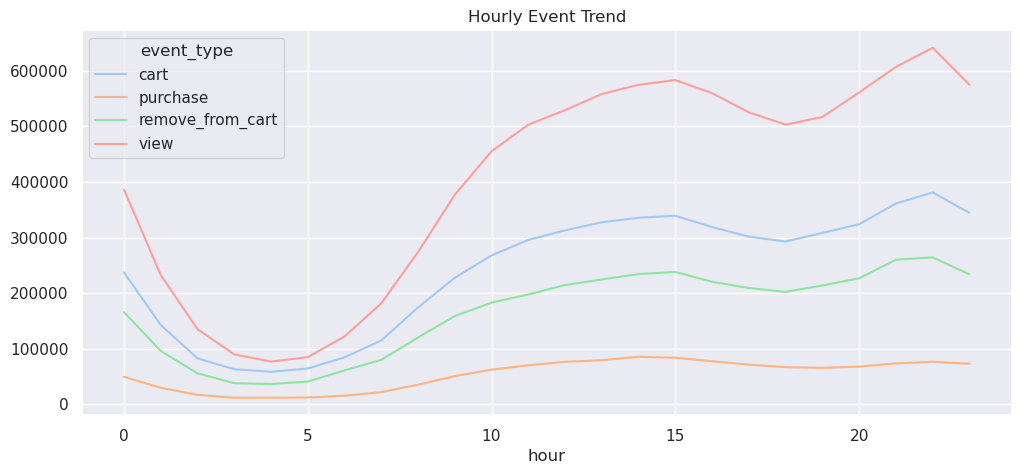

In [19]:
# 시간대-이벤트별 수 (선그래프)
hourly_event = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)

hourly_event.plot(figsize=(12,5), title='Hourly Event Trend')
plt.show()

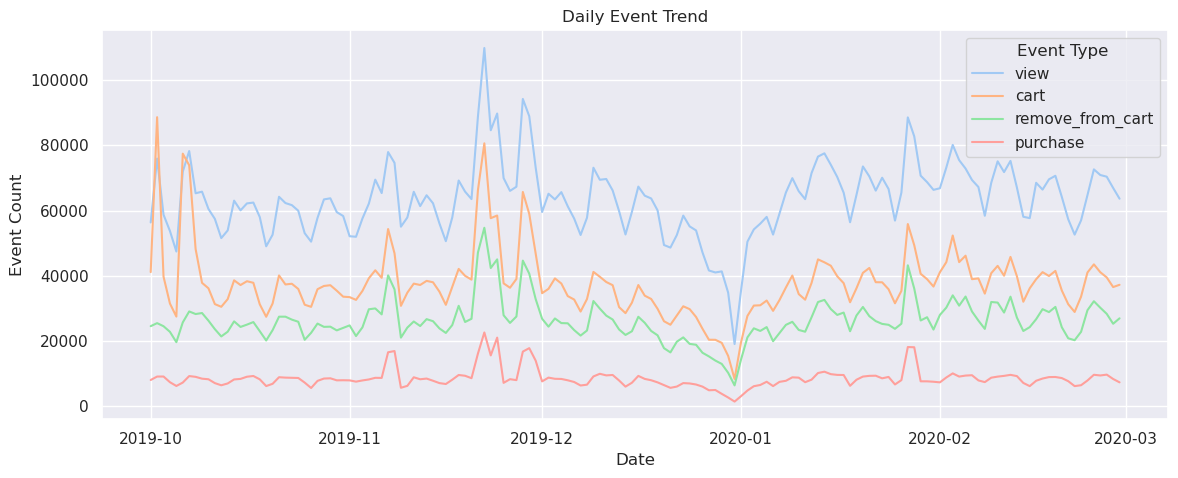

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 원하는 이벤트 순서 지정
event_order = ['view', 'cart', 'remove_from_cart', 'purchase']

# 2. 일자-이벤트별 집계 후 순서대로 정렬
daily_event = (
    df.groupby(['date', 'event_type'])
    .size()
    .unstack()
    .fillna(0)[event_order]  # 컬럼 순서 맞춤
)

# 3. 파스텔 팔레트 적용
sns.set_palette("pastel")
colors = sns.color_palette("pastel", n_colors=4)  # event_type 4개 기준

# 4. 시각화
daily_event.plot(figsize=(12, 5), color=colors)
plt.title('Daily Event Trend')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()


1. view
- 전 기간동안 가장 높은 빈도 기록
- 2019년 10~12월, 특히 12월 초와 말에 급증가(블프, 연말 프로모션 가능성)
- 2020년 1월 초, 연초 비활동 기간

2. cart
- view와 비슷한 양상을 보이지만 수치는 낮음
- 마찬가지로 12월에 몇차례 급등

3. remove_from_cart
- cart와 비슷하게 움직임
- 가끔 cart와의 간격이 좁아지는 시점이 존재 -> 장바구니에 담고 뺀 경우가 늘어 구매 전환율이 떨어졌을 가능성 있음

4. puchase
- 전체적으로 수치가 낮지만 일정하게 유지됨
- 11월~12월사이에 구매 증가, 블프 및 연말쇼핑으로 예상
- 1월말에도 급증한 모습을 보임

=>
- 12월에 쇼핑 성수기 가능성, 1월초 비쇼핑시기로 볼 수 있음
- 조회 - 장바구니 - 제거 - 구매 흐름의 퍼널구조가 비교적 명확함
- 장버구니 대비 제거가 많은 날 존재


=> 활용 방안
- 12월 집중 마케팅 전략 강화 (캠페인, 할인 등)

- 장바구니 제거율 높은 날 원인 분석 후 구매 유도 UX 개선

- 1월 이벤트 침체기 대응 (리마인더, 재참여 유도 전략)

추가분석필요
- remove_from_cart 비율이 높은 날짜를 별도로 추출해서 분석
- 구매 전환률 추이를 함께 분석

## 참고사항) 2019-10월에 보이는 비정상적 패턴
view보다 cart가 높게 나타남

In [21]:
# 일자별 event_type 카운트
df.groupby(['date', 'event_type']).size().unstack().fillna(0).head(10)

event_type,cart,purchase,remove_from_cart,view
date,,,,
2019-10-01,41099,7962,24492,56347
2019-10-02,88680,9020,25430,75969
2019-10-03,39707,9033,24479,58733
2019-10-04,31442,7283,22752,53718
2019-10-05,27441,6129,19579,47426
2019-10-06,77477,7171,25650,71959
2019-10-07,73917,9170,29021,78283
2019-10-08,48193,8931,28219,65312
2019-10-09,37805,8368,28528,65807


✅ 결론 정리
초기 이틀간(10/2, 10/6) cart 이벤트 수가 view보다 높은 특이 케이스가 존재합니다.

이는 일반적인 고객 행동 흐름에서 벗어나므로,

데이터 수집/적재 오류,

시스템 테스트,

자동화(bots) 등을 의심할 수 있습니다.

이후부터는 정상 흐름(view > cart)이므로,
EDA나 모델링 시 이 구간은 별도로 다루거나 필터링 고려하는 것이 좋습니다.

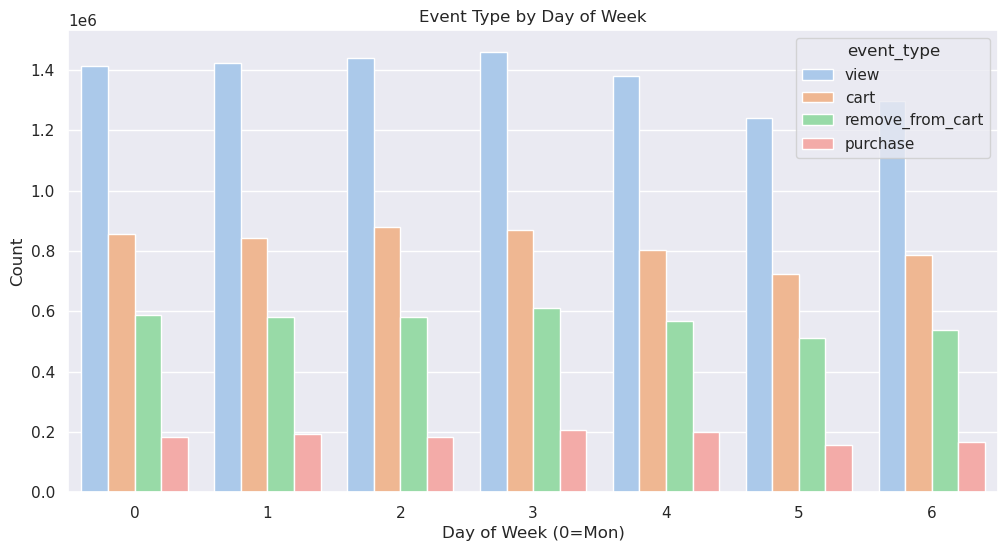

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("pastel")

# 요일별 이벤트 시각화
sns.countplot(data=df, x='dayofweek', hue='event_type',
              hue_order=['view', 'cart', 'remove_from_cart', 'purchase'])
plt.title('Event Type by Day of Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Count')
plt.show()


#### 월~목
- 전반적인 event_tpye 모두 활발함
- 수요일 view가 가장 높음
- 주중에 제품탐색(view)를 많이 함
- 구매(purchase)는 비교적 일관되어 보임

#### 금~일
- 사용자 활동 점차 감소됨
- 토요일은 최저치를 보임

=> 구매는 요일과 큰 상관이 없지만, view와 cart 활동이 많을 수록 전환 가능성은 높아질 수 있음.

##### 활용 아이디어
- 광고 및 프로모션 집중 요일: 화~목

- 구매 전환을 높이려면 수~목에 리마인더나 쿠폰 제공

- 주말엔 재참여 유도 전략 필요 (ex. 앱 푸시, 이메일)

In [23]:
# 이벤트 타입 float -> int로 바꾸기
df['event_month'] = df['event_month'].astype(int)

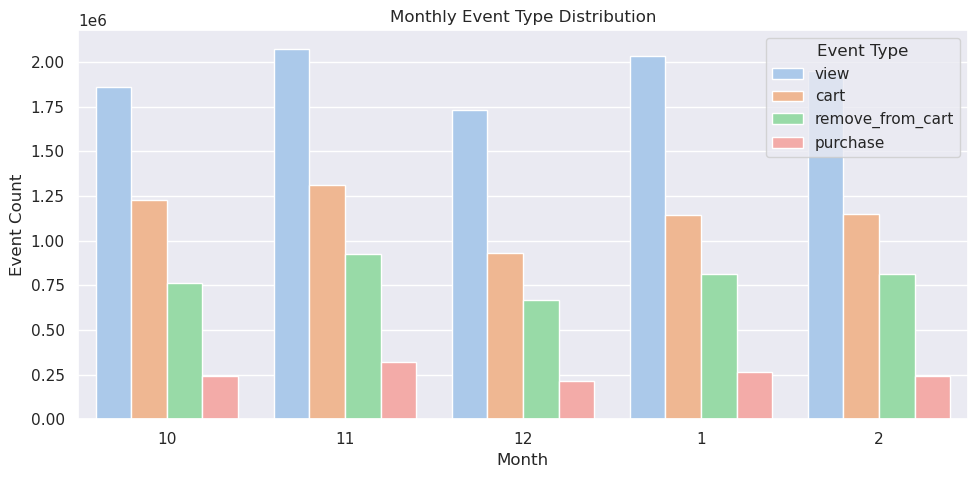

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# 월별 이벤트 유형 분포


# 월 순서를 명시적으로 지정
month_order = [10, 11, 12, 1, 2]
df['event_month'] = pd.Categorical(df['event_month'], categories=month_order, ordered=True)

# 이벤트 순서도 명시
event_order = ['view', 'cart', 'remove_from_cart', 'purchase']

# 예쁜 파스텔톤 색상 적용
sns.set_palette("pastel")

# 시각화
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='event_month', hue='event_type', hue_order=event_order)
plt.title('Monthly Event Type Distribution')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.xticks(rotation=0)
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()


1. view
- 11월 정점 : 마케팅 캠페인
- 12월은 하락함
- 1월 반등

2. cart
- 11월에 가장 활발
- 12월 감소
- 1,2월은 소폭 회복됨

3. remove_from_cart
- cart와 비슷한 추이 보임
- 12월은 감소했지만, 이탈이 개선되었다고 하기엔 어려움

4. purchase
- 11월에 가장 높음, 핵심 시기
- 12월에 가장 낮음
- 1월에 약간 상승했지만 2월에 다시 감소

=> 인사이트
- 11월은 조회, 장바구니, 구매 모두 활발한 시기로 전반적인 매출이 가장 높았을 가능성
- 2월 모든 이벤트가 큰 변동없이 평균적임


=> 추가 분석 필요
- 12월은 장바구니 이탈(cart - remove_from_cart)은 줄었지만 구매도 줄어듦
 - 결제까지 이어지지 않은 이유 분석 필요 (배송 이슈, 이벤트 종료 등)
 - 장바구니에 담지 않고 바로 구매했을 가능성
 - 상품을 담고도 구매하지 않고 사이트를 떠난 사용자가 많아졌을 가능성
 -> 이벤트별 전환율 분석필요
    - cart -> purchase
    - cart -> remove_from_cart

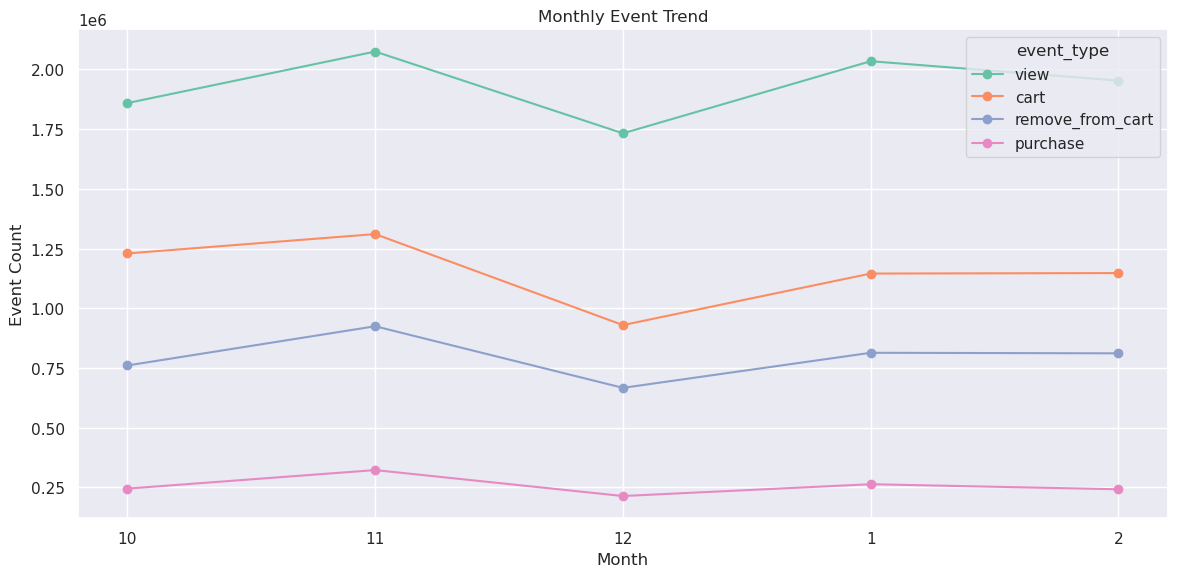

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 이벤트 유형별(Event Type) 발생 추이(선그래프)

# 월, 이벤트 순서 지정
month_order = [10, 11, 12, 1, 2]
event_order = ['view', 'cart', 'remove_from_cart', 'purchase']

# 월을 범주형으로 설정
df['event_month'] = pd.Categorical(df['event_month'], categories=month_order, ordered=True)

# 월별 event_type별 수 계산
monthly_event = (
    df.groupby(['event_month', 'event_type'])
      .size()
      .unstack()
      .reindex(columns=event_order)         # 컬럼 순서 정렬
      .loc[month_order]                     # 인덱스 순서 정렬
      .fillna(0)
)

# 스타일 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_palette("Set2")

# 시각화
monthly_event.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Monthly Event Trend')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.xticks(ticks=range(len(month_order)), labels=month_order)  # x축 월 정수로
plt.tight_layout()
plt.show()


# 분석3. 전환율 분석

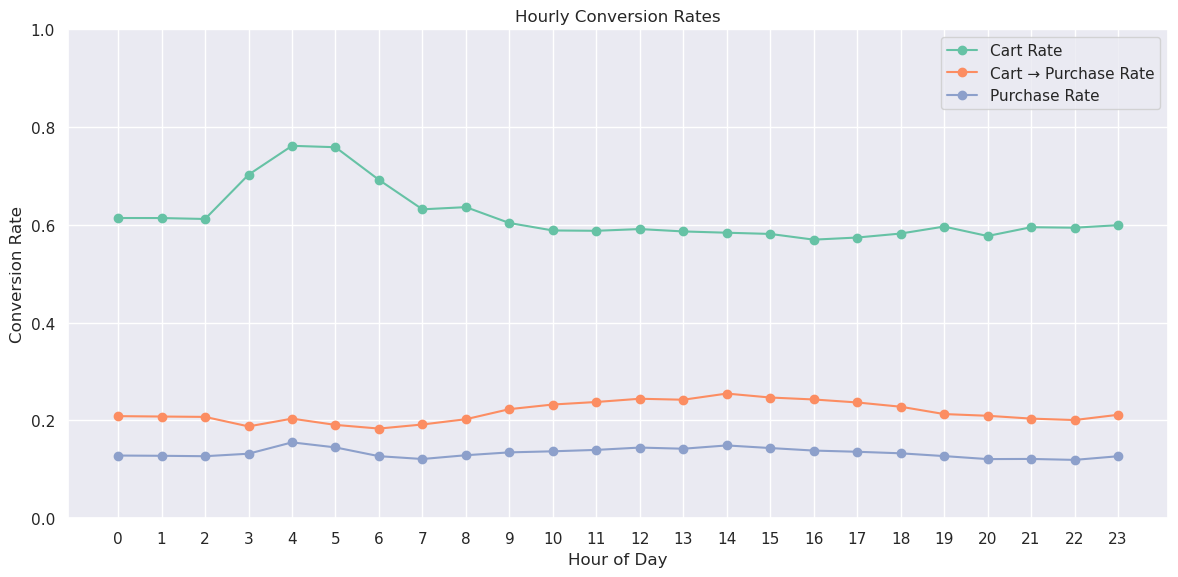

In [27]:
# 시간대별 이벤트 수 집계
hourly = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)

# 전환율 계산
hourly['cart_rate'] = hourly['cart'] / hourly['view']
hourly['purchase_rate'] = hourly['purchase'] / hourly['view']
hourly['cart_to_purchase'] = hourly['purchase'] / hourly['cart']

# 시각화
plt.figure(figsize=(12,6))
plt.plot(hourly.index, hourly['cart_rate'], marker='o', label='Cart Rate')
plt.plot(hourly.index, hourly['cart_to_purchase'], marker='o', label='Cart → Purchase Rate')
plt.plot(hourly.index, hourly['purchase_rate'], marker='o', label='Purchase Rate')
plt.title('Hourly Conversion Rates')
plt.xlabel('Hour of Day')
plt.ylabel('Conversion Rate')
plt.xticks(range(0, 24))
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 1. cart rate
: view(상품을 본 사람) 중 cart에 담은 비율
- 새벽 4시-6시 : 0.75수준까지 급상승 -> 방문자는 적지만, 의사결정이 빠른 구매 의향자가 많을 수 잇음
- 낮 10시-20시 : 0.58-0.60 안정적인 수준

### 2. cart -> purchase rate
   : cart(장바구니에 담은 사람) 중 실제 purchase한 비율
- 전반적으로 0.2-0.26사이에서 일정
- 14~15시에 가장 높은 전환율 기록
  
### 3. view -> purchse rate
   :view(상품을 본 사람) 중 실제 구매한 비율
   - 가장 낮은 전환율로 0.12-0.15 수준
   - 4~5시에는 소폭 상승, cart rate와 연결됨

### 인사이트
- 새벽 4~6시 : Cart Rate 급상승 → 구매 전환 의지 강한 고객 유입
- 오후 2~3시 : Cart → Purchase 전환율 최고 → 결제 유도 마케팅 타이밍 적합
- Purchase Rate는 낮지만, Cart Rate와 중간 전환율이 꾸준함

## 일별 전환률 분석_2019-10 확인필요

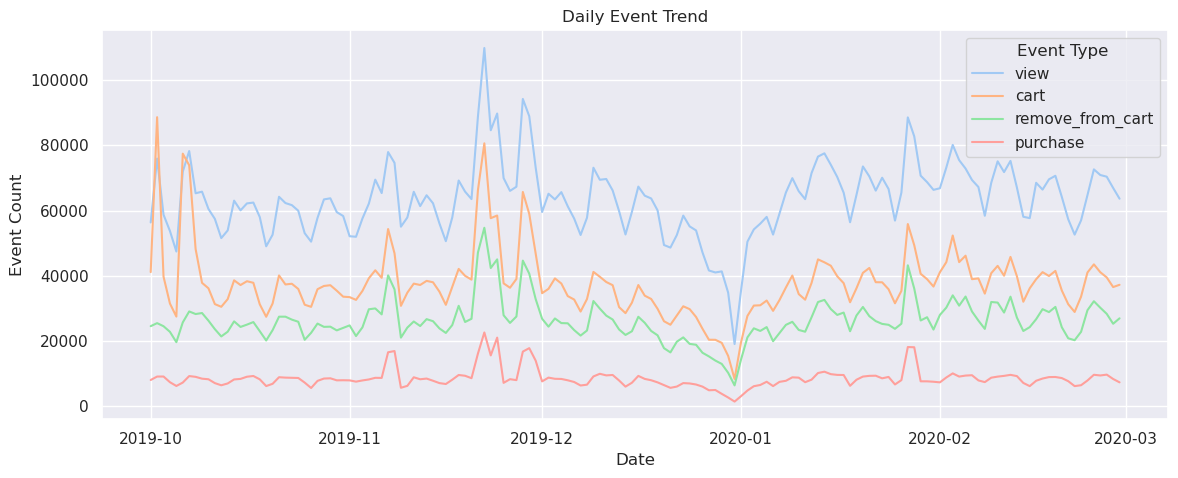

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 일별 이벤트 유형별 추이

# 1. 원하는 이벤트 순서 지정
event_order = ['view', 'cart', 'remove_from_cart', 'purchase']

# 2. 일자-이벤트별 집계 후 순서대로 정렬
daily_event = (
    df.groupby(['date', 'event_type'])
    .size()
    .unstack()
    .fillna(0)[event_order]  # 컬럼 순서 맞춤
)

# 3. 파스텔 팔레트 적용
sns.set_palette("pastel")
colors = sns.color_palette("pastel", n_colors=4)  # event_type 4개 기준

# 4. 시각화
daily_event.plot(figsize=(12, 5), color=colors)
plt.title('Daily Event Trend')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()


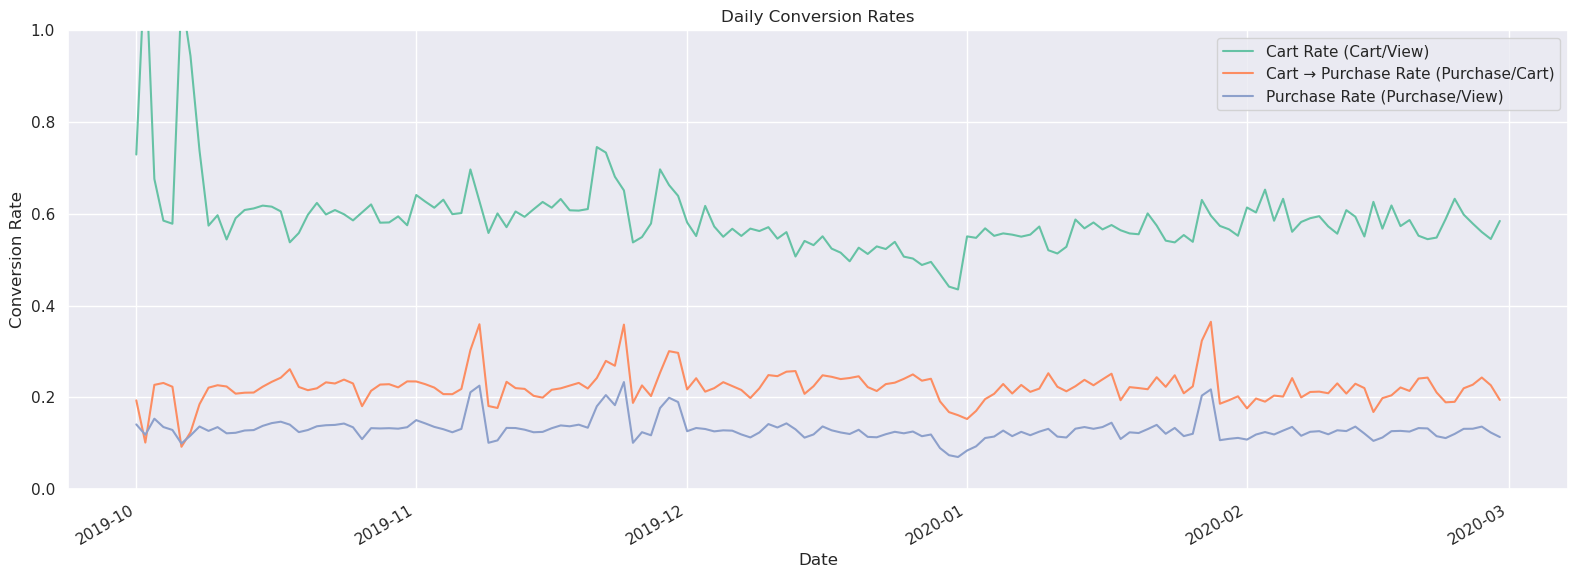

In [38]:
import matplotlib.dates as mdates

# 일별 전환율 추이

# 시각화
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(daily.index, daily['cart_rate'], label='Cart Rate (Cart/View)')
ax.plot(daily.index, daily['cart_to_purchase'], label='Cart → Purchase Rate (Purchase/Cart)')
ax.plot(daily.index, daily['purchase_rate'], label='Purchase Rate (Purchase/View)')

ax.set_title('Daily Conversion Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Conversion Rate')
ax.set_ylim(0, 1.0)
ax.legend()
ax.grid(True)

# 날짜 포맷 자동 지정
fig.autofmt_xdate()

plt.tight_layout()
plt.show()


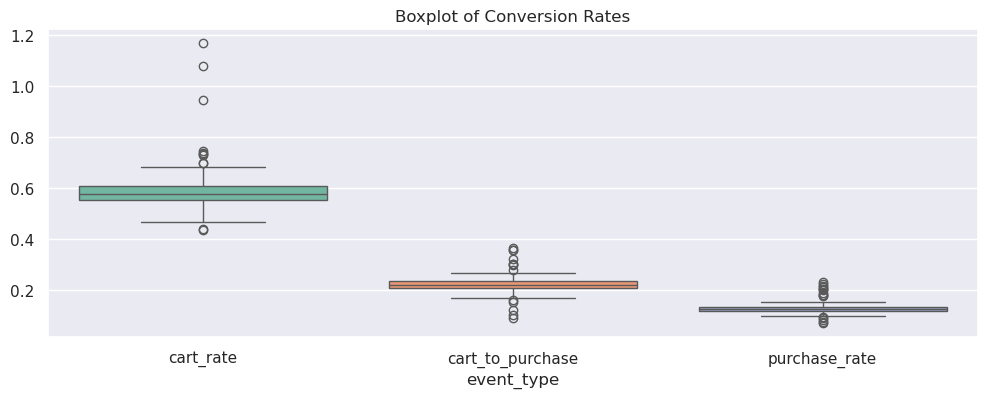

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot으로 이상치 시각화
plt.figure(figsize=(12, 4))
sns.boxplot(data=daily[['cart_rate', 'cart_to_purchase', 'purchase_rate']])
plt.title("Boxplot of Conversion Rates")
plt.show()


In [45]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# cart_rate의 이상치 찾기
outliers = detect_outliers_iqr(daily['cart_rate'])
print(outliers)


date
2019-10-01    0.729391
2019-10-02    1.167318
2019-10-06    1.076683
2019-10-07    0.944228
2019-10-08    0.737889
2019-11-07    0.696814
2019-11-21    0.745647
2019-11-22    0.733657
2019-11-28    0.697032
2019-12-30    0.441557
2019-12-31    0.435402
Name: cart_rate, dtype: float64


### 해석 및 주의할 점
1. 전환율이 1 이상인 날짜 (2019-10-02, 10-06 등)는 이상치로서 특히 주의가 필요합니다.
→ View 수보다 Cart 수가 많았다는 뜻인데, 데이터 적재 시 중복 기록, 누락 또는 이벤트 로그 오류일 수 있습니다.

2. 10월 초, 11월 말에 높은 전환율
→ 이벤트, 마케팅 캠페인 등이 집중되었을 가능성. 혹은 데이터 수가 적어서 비율 왜곡되었을 수도 있습니다.

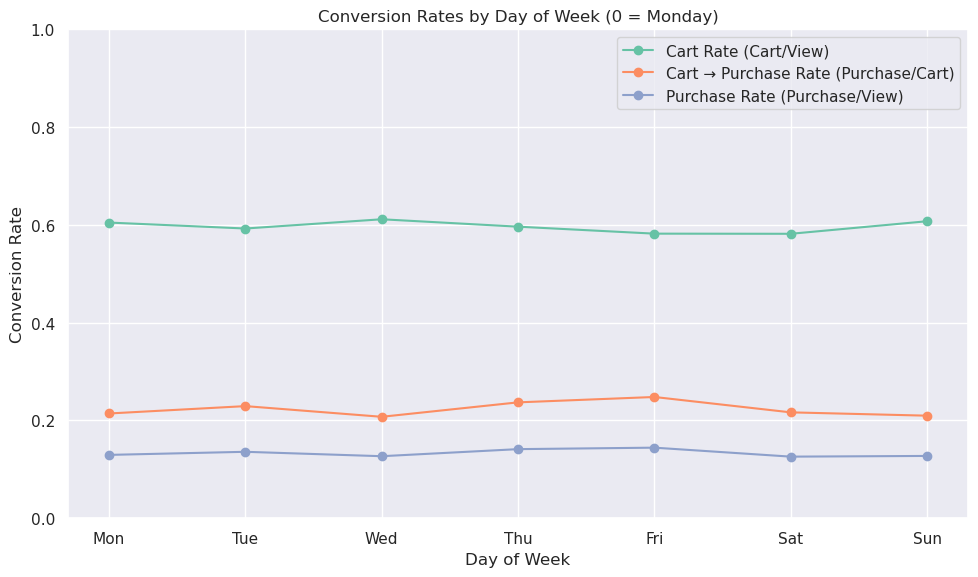

In [29]:
# 요일별 event_type별 수 집계
weekday = df.groupby(['dayofweek', 'event_type']).size().unstack().fillna(0)

# 전환율 계산
weekday['cart_rate'] = weekday['cart'] / weekday['view']
weekday['purchase_rate'] = weekday['purchase'] / weekday['view']
weekday['cart_to_purchase'] = weekday['purchase'] / weekday['cart']

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(weekday.index, weekday['cart_rate'], marker='o', label='Cart Rate (Cart/View)')
plt.plot(weekday.index, weekday['cart_to_purchase'], marker='o', label='Cart → Purchase Rate (Purchase/Cart)')
plt.plot(weekday.index, weekday['purchase_rate'], marker='o', label='Purchase Rate (Purchase/View)')
plt.title('Conversion Rates by Day of Week (0 = Monday)')
plt.xlabel('Day of Week')
plt.ylabel('Conversion Rate')
plt.ylim(0, 1)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### 인사이트
- 초반(월~화): 탐색(view)과 장바구니 담기(cart) 위주
- 중반(수~금): 장바구니 비율 유지 + 구매 전환률 증가
- 주말(토~일): 다시 탐색(view) 중심, 실제 구매(purchase)는 감소

#### 활용방안 전략
- 월요일 : 배송 무료/적립금 이벤트로 구매 유도
- 수~금 : 장바구니 리마인드 푸시/쿠폰
- 주말 : 관심 상품 알림 중심으로 탐색 유지 전략이 적절

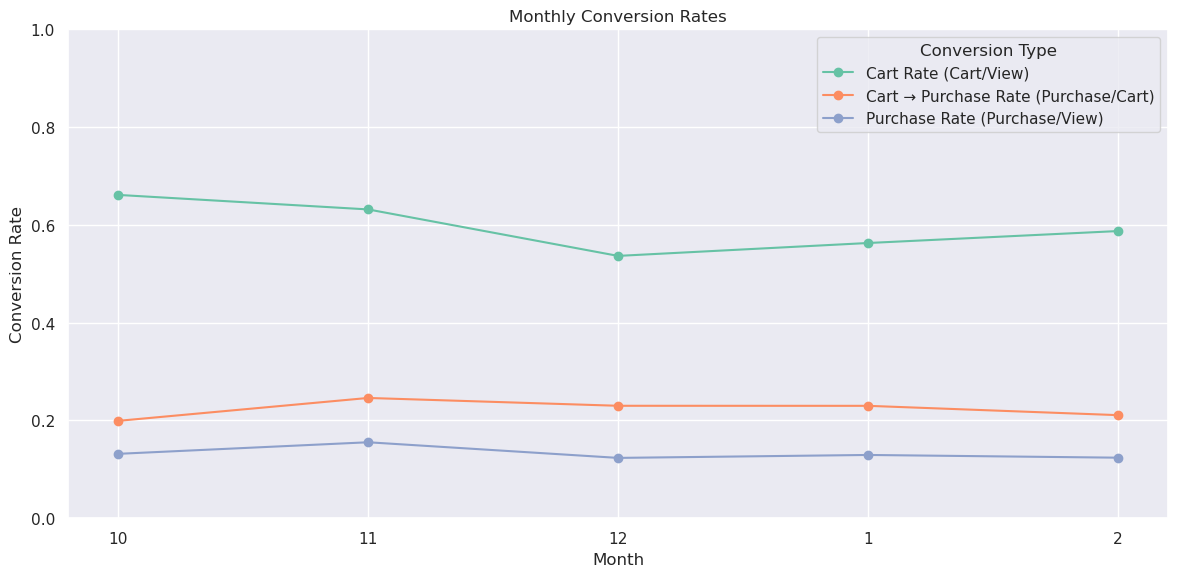

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 월 순서 정의 및 범주형 처리
month_order = [10, 11, 12, 1, 2]
df['event_month'] = pd.Categorical(df['event_month'], categories=month_order, ordered=True)

# 월별 이벤트 수 집계
monthly = df.groupby(['event_month', 'event_type']).size().unstack().fillna(0)
monthly = monthly.loc[month_order]  # 월 순서 정렬

# 전환율 계산
monthly['cart_rate'] = monthly['cart'] / monthly['view']
monthly['purchase_rate'] = monthly['purchase'] / monthly['view']
monthly['cart_to_purchase'] = monthly['purchase'] / monthly['cart']

# 인덱스를 컬럼으로 변환
monthly = monthly.reset_index()

# 전환율 시각화
plt.figure(figsize=(12,6))
plt.plot(monthly['event_month'].astype(str), monthly['cart_rate'], marker='o', label='Cart Rate (Cart/View)')
plt.plot(monthly['event_month'].astype(str), monthly['cart_to_purchase'], marker='o', label='Cart → Purchase Rate (Purchase/Cart)')
plt.plot(monthly['event_month'].astype(str), monthly['purchase_rate'], marker='o', label='Purchase Rate (Purchase/View)')
plt.title('Monthly Conversion Rates')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Conversion Type')
plt.grid(True)
plt.tight_layout()
plt.show()


### 1. cart rate
- 10,11,12월 순으로 감소
- 1,2월 다시 회복
- 12월이 가장 낮음
  - 탐색만 하고 장바구니에 덜담는 시기
    
### 2.  cart -> purchase rate
- 11월 피크
- 12-2월 비슷한 수준 유지

### 3.  view -> purchase rate
- 10-11월 증가, 11월 최대
- 12월부터 점진적 감소

### 인사이트
- 11월 : cart -> purchase 전환이 가장 잘 이루어진 시기
- 12월 : 3개의 지표 모두 감소
  - 재고, 배송지연, 이벤트 종료, 쇼핑 피로감 등의 가능성 있음
  - 특히 cart rate하락이 눈에 띄게 보임
- 2월 : 전반적으로 소폭 반등

### 활용 아이디어
- 11월 프로모션 성공사례분석 및 전략 재활용
- 12월 이탈 이유 파악 -> 이탈 행동 추적 
- 1-2월 회복세 반영 -> 신학기 맞춤 타겟팅

# 분석4. 추가적인 가설 검증

## H18. 주말보다 평일에 구매가 많음(주중/주말별 구매건수 비교)

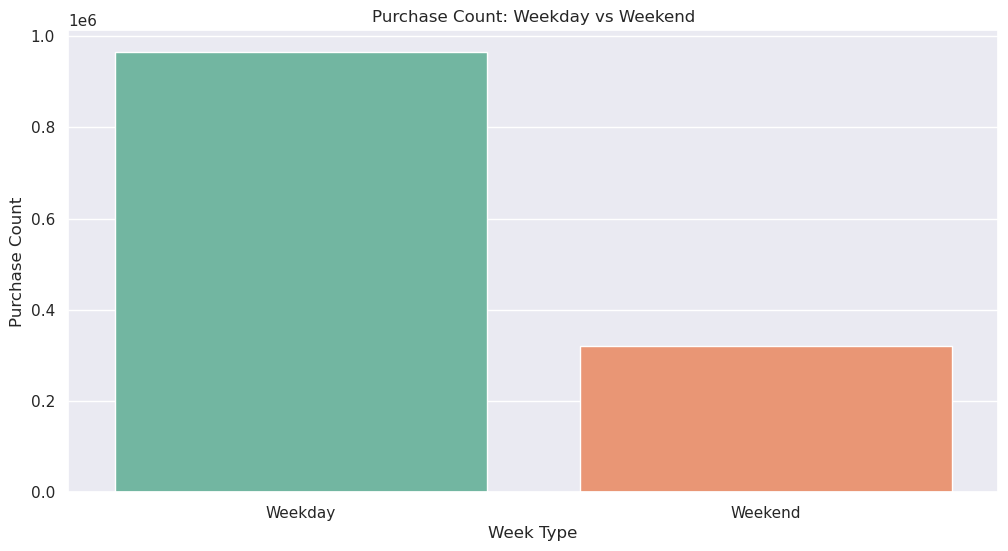

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# 구매 이벤트만 필터링
purchase_df = df[df['event_type'] == 'purchase']

# 주중/주말 구분 (dayofweek를 활용)
purchase_df['week_type'] = purchase_df['dayofweek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# 주중/주말별 구매 수 집계
week_purchase = purchase_df['week_type'].value_counts()

# 시각화
sns.barplot(x=week_purchase.index, y=week_purchase.values, palette='Set2')
plt.title('Purchase Count: Weekday vs Weekend')
plt.xlabel('Week Type')
plt.ylabel('Purchase Count')
plt.show()
